In [ ]:
import util.data_loading
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
debt_df= util.data_loading.load_raw_data('debt_2003_2025 _clean.csv')


Looking for file at: /Users/aaaaalaverga/DataspellProjects/CA_Housing_Analysis/data/debt_2003_2025 _clean.csv


In [ ]:
debt_df

,quarter,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,03:Q1,4.94,0.240,0.640,0.690,0.240,0.480,7.230
1,03:Q2,5.08,0.260,0.620,0.690,0.240,0.490,7.380
2,03:Q3,5.18,0.270,0.680,0.690,0.250,0.480,7.560
3,03:Q4,5.66,0.300,0.700,0.700,0.250,0.450,8.070
4,04:Q1,5.84,0.330,0.720,0.700,0.260,0.450,8.290
...,...,...,...,...,...,...,...,...
86,24:Q3,12.59,0.387,1.644,1.166,1.606,0.546,17.943
87,24:Q4,12.61,0.396,1.655,1.211,1.615,0.554,18.036
88,25:Q1,12.80,0.402,1.642,1.182,1.631,0.542,18.203
89,25:Q2,12.94,0.411,1.655,1.209,1.638,0.540,18.388


In [ ]:
debt_df.columns


Index(['quarter', 'Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Student Loan', 'Other', 'Total', 'yy', 'q', 'year', 'quarter_start'],
      dtype='object')

In [ ]:
debt_df2= util.data_loading.load_raw_data('debt_pre_2003.csv')
debt_df2 = debt_df2.T

debt_df2.columns = debt_df2.iloc[0]
debt_df2 = debt_df2[1:]

debt_df2 = debt_df2.reset_index()
debt_df2 = debt_df2.rename(columns={"index": "quarter"})


Looking for file at: /Users/aaaaalaverga/DataspellProjects/CA_Housing_Analysis/data/debt_pre_2003.csv


In [ ]:
debt_df2

quarter,quarter,Mortgage,HE Revolving,Auto Loan,Credit Card,Other,Total
0,99:Q1,3.2,0.08,0.35,0.48,0.43,4.54
1,99:Q2,3.31,0.08,0.35,0.48,0.41,4.63
2,99:Q3,3.46,0.09,0.38,0.5,0.39,4.82
3,99:Q4,3.37,0.1,0.39,0.5,0.4,4.76
4,00:Q1,3.62,0.1,0.41,0.52,0.41,5.06
5,00:Q2,3.71,0.11,0.44,0.54,0.45,5.25
6,00:Q3,3.82,0.1,0.46,0.53,0.43,5.34
7,00:Q4,3.9,0.12,0.47,0.58,0.44,5.51
8,01:Q1,4.08,0.12,0.51,0.6,0.45,5.76
9,01:Q2,3.84,0.13,0.51,0.61,0.44,5.53


In [ ]:
debt_df2[['yy', 'q']] = debt_df2['quarter'].str.extract(r'(\d{2}):Q([1-4])')
debt_df2['yy'] = debt_df2['yy'].astype(int)

debt_df2['year'] = debt_df2['yy'].apply(lambda y: 2000 + y if y <= 24 else 1900 + y)

debt_df2['quarter'] = pd.PeriodIndex(debt_df2['year'].astype(str) + 'Q' + debt_df2['q'], freq='Q')

debt_df2['quarter_start'] = debt_df2['quarter'].dt.to_timestamp()

In [ ]:
debt_df2.tail()

quarter,quarter,Mortgage,HE Revolving,Auto Loan,Credit Card,Other,Total,yy,q,year,quarter_start
11,2001Q4,4.15,0.16,0.55,0.64,0.43,5.93,1,4,2001,2001-10-01
12,2002Q1,4.45,0.17,0.58,0.63,0.43,6.26,2,1,2002,2002-01-01
13,2002Q2,4.43,0.18,0.58,0.66,0.45,6.3,2,2,2002,2002-04-01
14,2002Q3,4.74,0.2,0.61,0.68,0.46,6.69,2,3,2002,2002-07-01
15,2002Q4,4.66,0.22,0.63,0.69,0.46,6.66,2,4,2002,2002-10-01


In [ ]:
debt_df[['yy', 'q']] = debt_df['quarter'].str.extract(r'(\d{2}):Q([1-4])')
debt_df['yy'] = debt_df['yy'].astype(int)

debt_df['year'] = debt_df['yy'].apply(lambda y: 2000 + y if y <= 24 else 1900 + y)

debt_df['quarter'] = pd.PeriodIndex(debt_df['year'].astype(str) + 'Q' + debt_df['q'], freq='Q')
debt_df['quarter_start'] = debt_df['quarter'].dt.to_timestamp()

In [ ]:
debt_df

,quarter,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,yy,q,year,quarter_start
0,2003Q1,4.94,0.240,0.640,0.690,0.240,0.480,7.230,3,1,2003,2003-01-01
1,2003Q2,5.08,0.260,0.620,0.690,0.240,0.490,7.380,3,2,2003,2003-04-01
2,2003Q3,5.18,0.270,0.680,0.690,0.250,0.480,7.560,3,3,2003,2003-07-01
3,2003Q4,5.66,0.300,0.700,0.700,0.250,0.450,8.070,3,4,2003,2003-10-01
4,2004Q1,5.84,0.330,0.720,0.700,0.260,0.450,8.290,4,1,2004,2004-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
86,2024Q3,12.59,0.387,1.644,1.166,1.606,0.546,17.943,24,3,2024,2024-07-01
87,2024Q4,12.61,0.396,1.655,1.211,1.615,0.554,18.036,24,4,2024,2024-10-01
88,1925Q1,12.80,0.402,1.642,1.182,1.631,0.542,18.203,25,1,1925,1925-01-01
89,1925Q2,12.94,0.411,1.655,1.209,1.638,0.540,18.388,25,2,1925,1925-04-01


In [ ]:
debt_df = debt_df[debt_df['year'] >  1990]

In [ ]:

debt_all = pd.concat(
    [debt_df2, debt_df],
    axis=0,          # stack rows
    ignore_index=True
)

In [ ]:
debt_all.shape

(104, 12)

In [ ]:
debt_all.columns

Index(['quarter', 'Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Other', 'Total', 'yy', 'q', 'year', 'quarter_start', 'Student Loan'],
      dtype='object')

In [ ]:
debt_all["year"].min()


np.int64(1999)

In [ ]:
debt_all["year"].max()

np.int64(2024)

In [ ]:
cols = ['Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Other', 'Total']   # pick your columns
debt_all[cols] = debt_all[cols].astype(float)

In [ ]:
debt_all

,quarter,Mortgage,HE Revolving,Auto Loan,Credit Card,Other,Total,yy,q,year,quarter_start,Student Loan
0,1999Q1,3.20,0.080,0.350,0.480,0.430,4.540,99,1,1999,1999-01-01,NaN
1,1999Q2,3.31,0.080,0.350,0.480,0.410,4.630,99,2,1999,1999-04-01,NaN
2,1999Q3,3.46,0.090,0.380,0.500,0.390,4.820,99,3,1999,1999-07-01,NaN
3,1999Q4,3.37,0.100,0.390,0.500,0.400,4.760,99,4,1999,1999-10-01,NaN
4,2000Q1,3.62,0.100,0.410,0.520,0.410,5.060,0,1,2000,2000-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023Q4,12.25,0.360,1.607,1.129,0.554,17.503,23,4,2023,2023-10-01,1.601
100,2024Q1,12.44,0.376,1.616,1.115,0.543,17.687,24,1,2024,2024-01-01,1.595
101,2024Q2,12.52,0.380,1.626,1.142,0.544,17.796,24,2,2024,2024-04-01,1.585
102,2024Q3,12.59,0.387,1.644,1.166,0.546,17.943,24,3,2024,2024-07-01,1.606


## Mortgage Debt Scatter Plot / Descriptive Stats

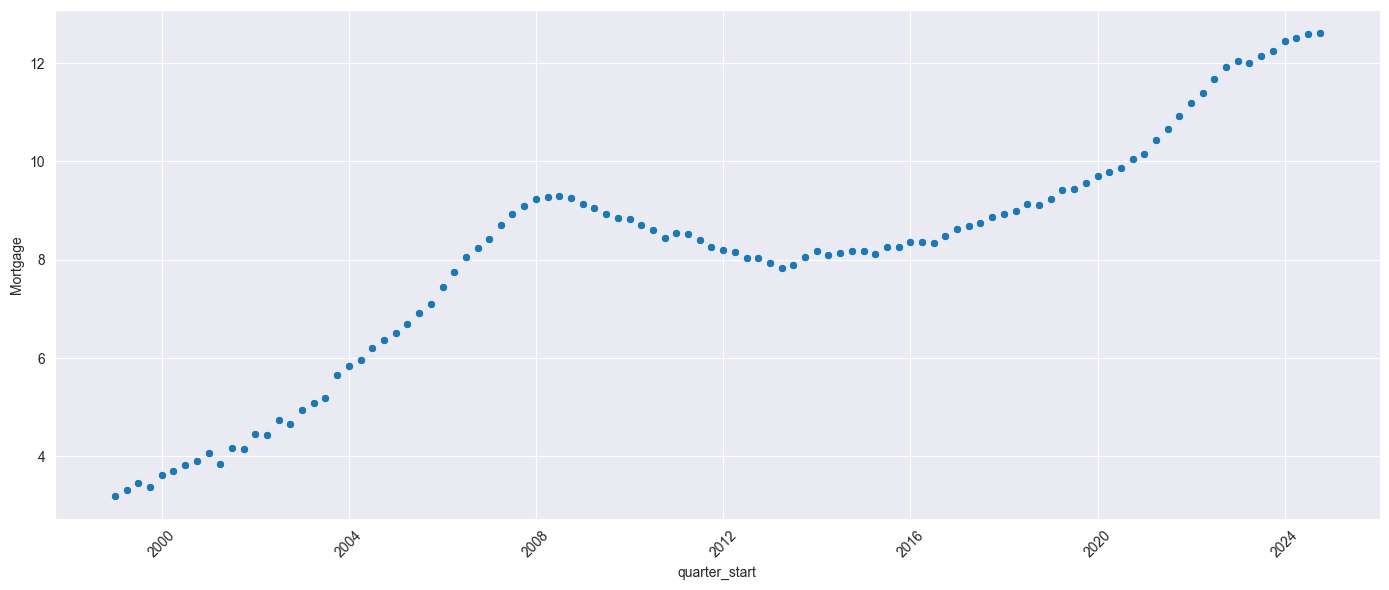

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = debt_all, x = "quarter_start", y ="Mortgage")
ax = plt.gca()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
col = debt_all["Mortgage"].describe()

count    104.000000
mean       8.091827
std        2.396600
min        3.200000
25%        6.857500
50%        8.385000
75%        9.245000
max       12.610000
Name: Mortgage, dtype: float64

## Total Debt Scatter Plot / Descriptive Stats


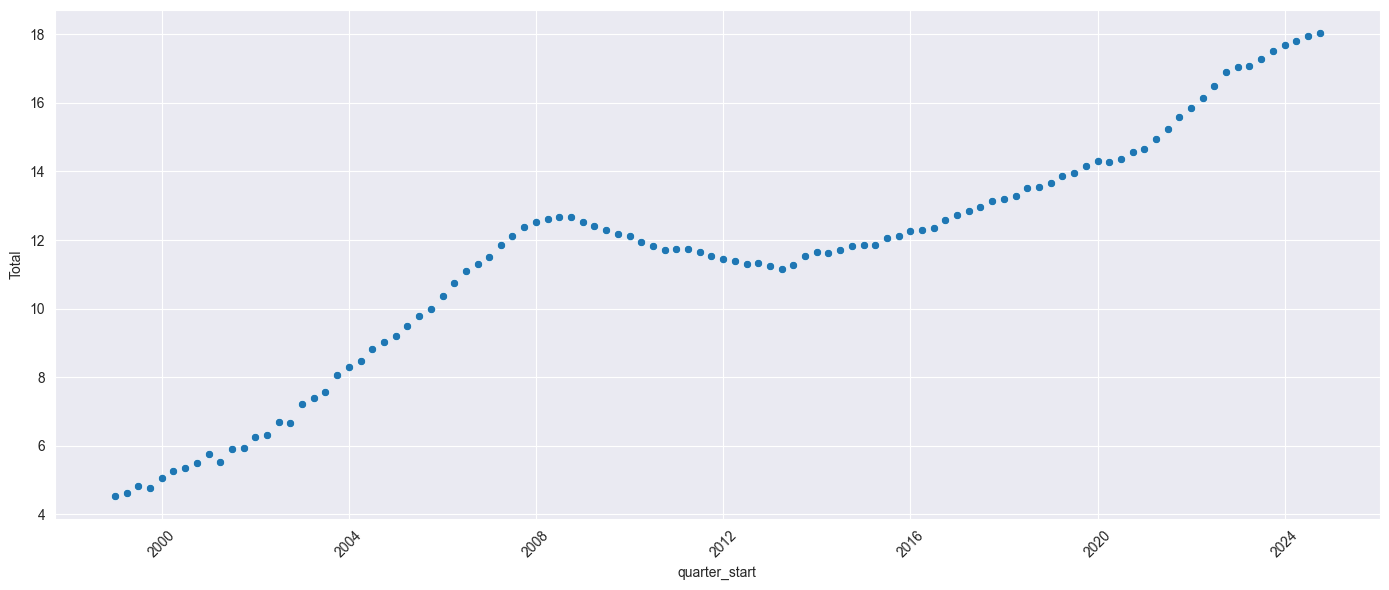

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = debt_all, x = "quarter_start", y ="Total")
ax = plt.gca()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
col = debt_all["Total"].describe()
col

count    104.000000
mean      11.511587
std        3.438738
min        4.540000
25%        9.715000
50%       11.850000
75%       13.345000
max       18.036000
Name: Total, dtype: float64

## Student Debt Scatter Plot / Descriptive Stats


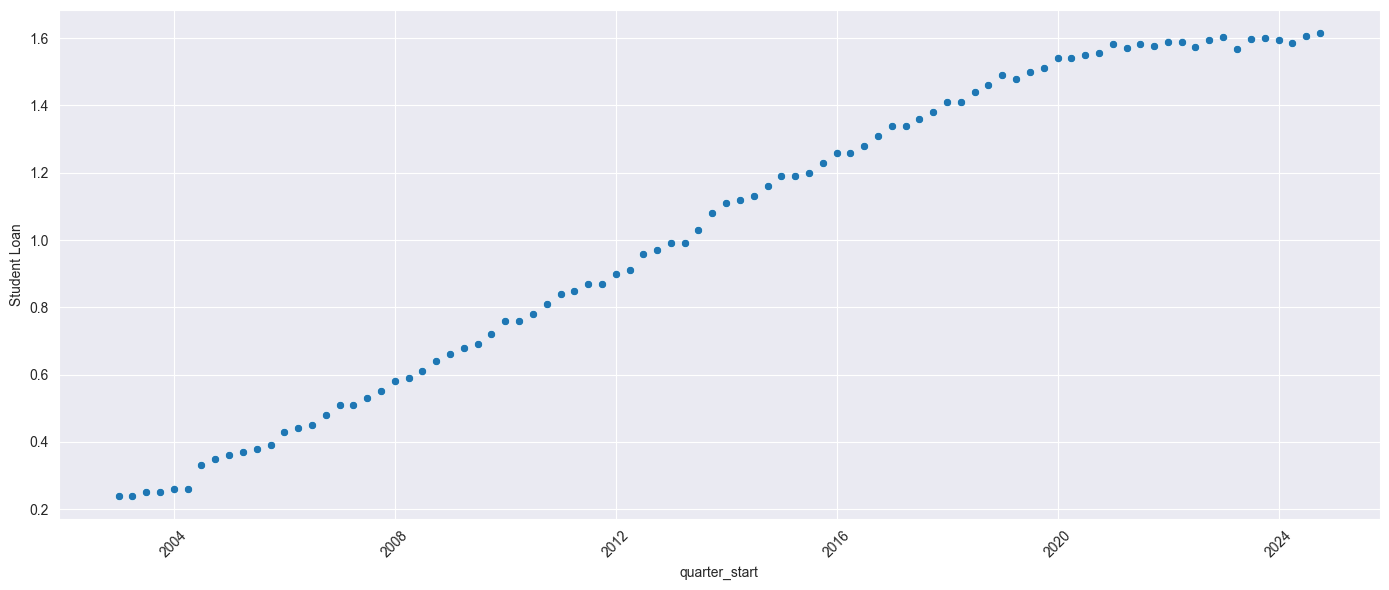

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = debt_all, x = "quarter_start", y ="Student Loan")
ax = plt.gca()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
col = debt_all["Student Loan"].describe()
col

count    88.000000
mean      1.026148
std       0.463933
min       0.240000
25%       0.605000
50%       1.095000
75%       1.492500
max       1.615000
Name: Student Loan, dtype: float64

## Credit Card Debt Scatter Plot / Descriptive Stats

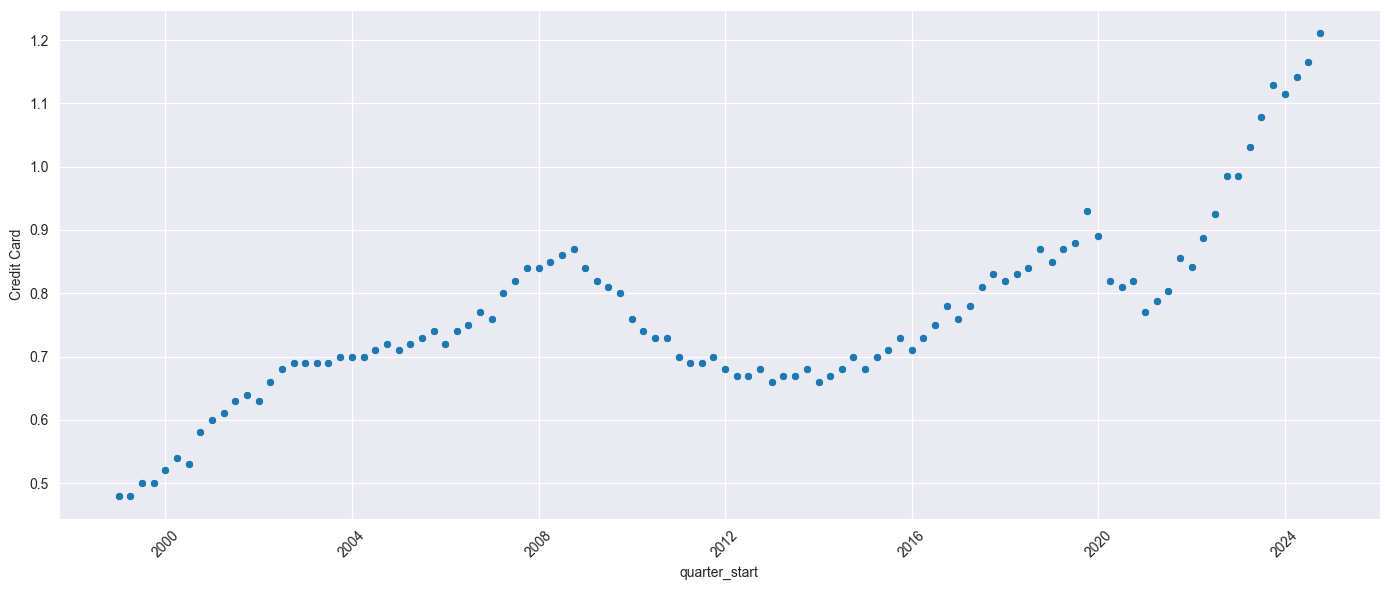

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = debt_all, x = "quarter_start", y ="Credit Card")
ax = plt.gca()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
col = debt_all["Credit Card"].describe()
col

count    104.000000
mean       0.763500
std        0.141617
min        0.480000
25%        0.680000
50%        0.735000
75%        0.832500
max        1.211000
Name: Credit Card, dtype: float64

## Extrating out only yearly data from fourth quarter

In [ ]:

col = ["Mortgage", "quarter_start"]
mortgage = debt_all[col].copy()
mortgage = mortgage[mortgage["quarter_start"].dt.month == 10].copy()
mortgage["Year"] = mortgage["quarter_start"].dt.year

mortgage.drop("quarter_start", axis=1, inplace=True)


In [ ]:
mortgage

,Mortgage,Year
3,3.37,1999
7,3.90,2000
11,4.15,2001
15,4.66,2002
19,5.66,2003
23,6.36,2004
27,7.10,2005
31,8.23,2006
35,9.10,2007
39,9.26,2008
